In [1]:
import os
import re
non_decimal = re.compile(r'[^\d.]+')

In [2]:
import pandas as pd
import os
import numpy as np

outputfolder='twitnotebook'
notebookpath=os.path.join(os.getcwd(),outputfolder)
logdir=os.listdir(notebookpath)
logfolders=[x for x in logdir]

def return_median_mass(x):
#     cc=df['attmaxidx '].values[0].strip().replace("'","").split(",")
    cc=x.strip().replace("'","").split(",")
    attentionmass=[float(non_decimal.sub('', x)) for x in cc]
    MedianMass=pd.Series(attentionmass).median()
    return MedianMass
def return_median_mass_series(x):
#     cc=df['attmaxidx '].values[0].strip().replace("'","").split(",")
    cc=x.strip().replace("'","").split(",")
    attentionmass=[float(non_decimal.sub('', x)) for x in cc]
    MedianMass=pd.Series(attentionmass)
    return MedianMass

In [22]:
mega_df=pd.DataFrame()

for l in logfolders:
#     print(l)
    os.chdir(os.path.join(notebookpath,l))
    files = [x for x in [x for x in os.listdir() if 'results' in x] if 'test' in x]
    
#     print(files) 
    my_dict={}
    dict_attention_per_epoch={}
    for y2 in files:
        
        file = open(y2)

        data = file.read()
        data2=data.split('\n')
        for j in range(len(data2)-1):
            result=data2[j].split("=")
            my_dict[result[0]]=result[1]
        df=pd.Series(my_dict).to_frame().rename(columns={0:'Result'}).T
        seed=y2.split("_")[1]
        df['MedianAttentionMass']=df['attmaxidx '].apply(lambda x:return_median_mass(x))
        df['Seed']=seed
        df['Epoch']=y2.split("_")[3]
        df['Lambda']=y2.split("_")[2]
        df['Obj']=l[1:]
        x=df['attmaxidx '].apply(lambda x:return_median_mass_series(x)).T
        x=x.values
        df['MedianAttentionMassSeries']=[x.flatten()]
        mega_df=mega_df.append(df)
        

In [19]:
x.flatten()

array([0.98560429, 0.98222512, 0.98375797, ..., 0.96236169, 0.95357484,
       0.96448946])

In [31]:
c1=mega_df['Obj']=='mean'
c2=mega_df['Lambda']=='0.0'
c3=mega_df['Seed']=='1'
temp=mega_df.loc[c1&c2&c3]

In [36]:
df_1=pd.DataFrame()
for j,x in enumerate(temp['MedianAttentionMassSeries']):
        df_1[j]=x


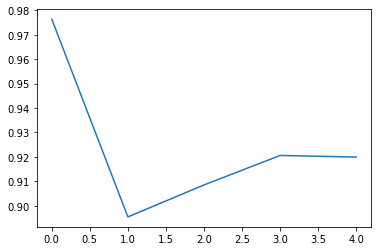

In [49]:
df_1.median().T.plot()

Text(0, 0.5, '% of Attention Mass placed on Permissible Tokens')

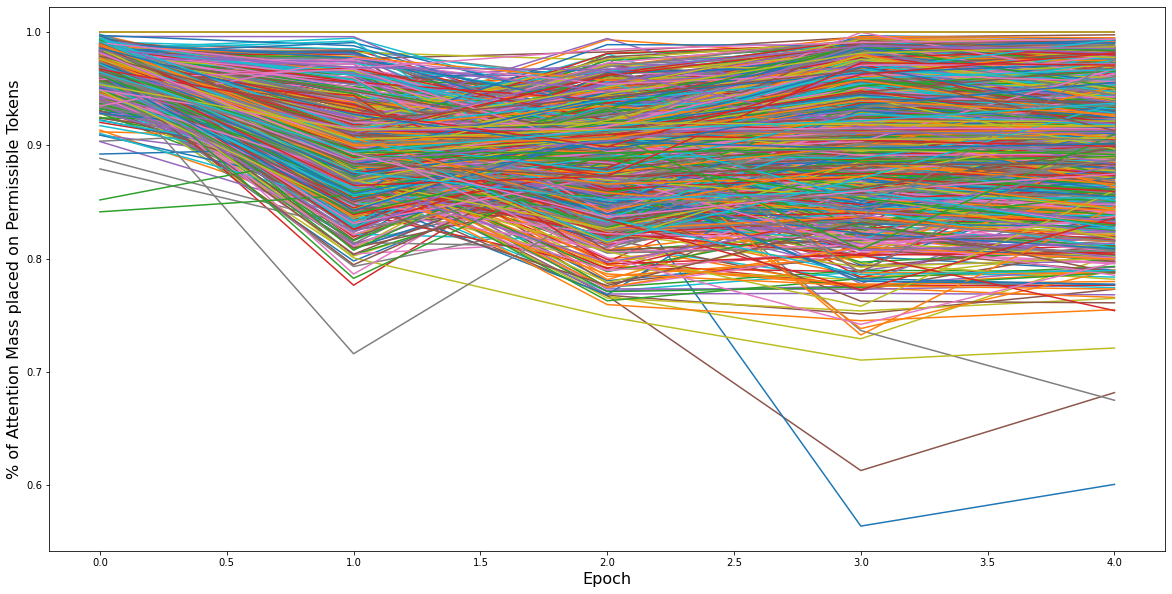

In [46]:

import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8,6))

ax=df_1.T.plot(figsize=(20,10),legend=False)
ax.set_xlabel("Epoch", fontsize=16)
ax.set_ylabel("% of Attention Mass placed on Permissible Tokens", fontsize=16)



In [128]:
for x in mega_df.columns:
    try:
        mega_df[x]=mega_df[x].astype(float)
    except:
        print('couldnt change '+x )

couldnt change attmaxidx 
couldnt change loss 
couldnt change Obj


In [129]:
mega_df.groupby(['Obj','Lambda','Epoch']).mean()[['acc ','avg_mean_attention_mass ','MedianAttentionMass']]

acc   avg_mean_attention_mass   MedianAttentionMass
Obj  Lambda Epoch                                                       
max  0.0    0.0    0.0975                  0.026325             0.976322
            1.0    0.5270                  0.104974             0.895419
mean 0.0    0.0    0.0975                  0.026325             0.976322
            1.0    0.5270                  0.104974             0.895419
            2.0    0.5600                  0.099947             0.908495
            3.0    0.5640                  0.082261             0.920567
            4.0    0.5640                  0.083207             0.919912